
# Einführing in die Bildklassifizierung mit PyTorch und dem CalTech 101-Datensatz: Ein umfassender Leitfaden

Willkommen zu unserem umfassenden Leitfaden zur Bildklassifizierung mit PyTorch und dem CalTech 101-Datensatz! In diesem Blogpost werden wir gemeinsam den aufregenden Prozess der Bildklassifizierung mit einer der beliebtesten Deep Learning-Bibliotheken, PyTorch, erkunden. Wir werden uns speziell auf den CalTech 101-Datensatz konzentrieren, der eine breite Palette von Objektklassen umfasst und sich ideal für das Training und die Evaluierung von Bildklassifizierungsmodellen eignet.

In diesem Leitfaden werden wir Schritt für Schritt vorgehen, angefangen bei der Datenbeschaffung und -vorbereitung bis hin zur Modellarchitektur und dem Training des Klassifizierungsmodells. Wir werden die grundlegenden Konzepte der Bildklassifizierung erläutern und Ihnen praktische Einblicke geben, wie Sie PyTorch effektiv für dieses spannende Aufgabengebiet einsetzen können.

Ob Sie ein erfahrener Deep Learning-Praktiker oder ein Neuling in diesem Bereich sind, dieser Leitfaden wird Ihnen helfen, ein solides Verständnis für die Bildklassifizierung mit PyTorch und den CalTech 101-Datensatz zu entwickeln. Lassen Sie uns also ohne weitere Verzögerung in die faszinierende Welt der Bildklassifizierung eintauchen!



## Die benötigten Bibliotheken: Eine Einführung

Für unseren Bildklassifizierungs-Leitfaden mit PyTorch und dem CalTech 101-Datensatz werden wir verschiedene Bibliotheken verwenden, um verschiedene Aufgaben zu erfüllen. Hier sind die wichtigsten Bibliotheken, die wir benötigen, und eine kurze Einführung dazu:

- **torchvision**: Diese Bibliothek bietet eine breite Palette von Funktionen und Tools für Computer Vision-Anwendungen. Sie enthält vorgefertigte Datensätze, Transforms zur Datenverarbeitung und -augmentierung, sowie Modelle für gängige Aufgaben wie Bildklassifizierung, Objekterkennung und Segmentierung.

- **torch**: Dies ist die Kernbibliothek von PyTorch, die die grundlegenden Funktionen für das maschinelle Lernen und das neuronale Netzwerktraining bereitstellt. Hier finden Sie Funktionen für Tensormanipulationen, mathematische Operationen, Optimierungsalgorithmen und vieles mehr.

- **matplotlib**: Diese Bibliothek wird verwendet, um Diagramme, Grafiken und Visualisierungen zu erstellen. In unserem Leitfaden werden wir matplotlib verwenden, um die Genauigkeit und den Verlust unseres Modells im Verlauf des Trainings zu visualisieren.

- **numpy**: Numpy ist eine Python-Bibliothek für numerische Berechnungen. Wir werden sie verwenden, um Daten in Form von Arrays zu verarbeiten und mathematische Operationen durchzuführen.

- **torch.nn**: Dieses Modul von PyTorch enthält Klassen und Funktionen für den Aufbau von neuronalen Netzwerken. Es ermöglicht uns, verschiedene Schichten, Aktivierungsfunktionen, Verlustfunktionen und andere Komponenten unseres Modells zu definieren.

- **torch.nn.functional**: Dieses Modul enthält Funktionen für verschiedene Operationen in neuronalen Netzwerken, wie z.B. Aktivierungsfunktionen, Pooling und Normalisierung.

- **torchsummary**: Diese Bibliothek bietet eine nützliche Funktion, um eine Zusammenfassung des Modells zu erstellen, einschließlich der Anzahl der Parameter und der Größe der Ausgabe.

- **torchviz**: Mit dieser Bibliothek können wir das neuronale Netzwerk visualisieren, indem wir ein Diagramm der Berechnungsgraphen erstellen.

- **torch.utils.data**: Dieses Modul enthält Tools und Klassen zur Verarbeitung von Daten und zum Erstellen von Datenladern für das Training und die Evaluation von Modellen.

- **tqdm**: Diese Bibliothek ermöglicht es uns, den Fortschritt von Schleifen und Prozessen anzuzeigen und somit den Trainingsprozess zu überwachen.

Um diese Bibliotheken zu installieren, können wir das Python-Paketverwaltungssystem `pip` verwenden. Führen Sie die folgenden Befehle in Ihrer Python-Umgebung aus:

```
pip install torch torchvision matplotlib numpy torchsummary torchviz tqdm
```

Nachdem Sie diese Bibliotheken erfolgreich installiert haben, können wir mit der Entwicklung unseres Bildklassifizierungsmodells beginnen und den CalTech 101-Datensatz nutzen.

In [5]:
# Importiere die Bibliotheken
import torchvision as tv
import torch as tc
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchviz import make_dot
from torch.utils.data import random_split
from tqdm import tqdm

# Nur für M1 Macs - Abhängig von deinem Gerät kannst du das Training mithilfe deiner GPU beschleunigen.
device = tc.device('mps' if tc.backends.mps.is_available() else 'cpu');



## Der CalTech 101-Datensatz: Ein Überblick

Der CalTech 101-Datensatz ist ein weit verbreiteter und viel genutzter Benchmark-Datensatz in der Bildklassifizierung. Er wurde an der California Institute of Technology (CalTech) entwickelt und besteht aus Bildern, die in 101 verschiedenen Objektkategorien aufgeteilt sind. Jede Kategorie enthält eine Vielzahl von Bildern, die jeweils ein spezifisches Objekt repräsentieren.

Warum nutzen wir gerade den CalTech 101-Datensatz? Es gibt mehrere Gründe, warum dieser Datensatz für die Bildklassifizierung ideal ist:

1. **Vielfalt der Objektklassen**: Der CalTech 101-Datensatz deckt eine breite Palette von Objektkategorien ab, darunter Tiere, Fahrzeuge, Möbel, Pflanzen und viele andere. Dies ermöglicht uns, die Fähigkeiten unserer Bildklassifizierungsmodelle auf einer Vielzahl von Objekten zu testen und zu evaluieren.

2. **Anzahl der Bilder**: Der Datensatz enthält insgesamt mehrere Tausend Bilder, wodurch ausreichend Daten zur Verfügung stehen, um zuverlässige Modelle zu trainieren. Die ausreichende Anzahl an Beispielen pro Objektklasse gewährleistet, dass das Modell verschiedene Variationen des gleichen Objekts erlernen kann.

3. **Herausforderungen der Daten**: Die Bilder im CalTech 101-Datensatz können unterschiedliche Ansichten, Hintergründe, Beleuchtungsbedingungen und Skalierungen aufweisen. Dies stellt eine Herausforderung dar, da das Modell robust genug sein muss, um diese Variationen zu bewältigen und dennoch präzise Vorhersagen zu treffen.

Durch die Verwendung des CalTech 101-Datensatzes können wir unsere Bildklassifizierungsmodelle umfassend testen und evaluieren. Das Ziel besteht darin, ein Modell zu entwickeln, das in der Lage ist, Objekte in Bildern präzise zu identifizieren und ihnen die richtige Kategorie zuzuordnen.

Im nächsten Abschnitt werden wir uns mit der Beschaffung und Vorbereitung des CalTech 101-Datensatzes befassen, um unseren Bildklassifizierungsleitfaden fortzusetzen.

Dieser Datensatz ist glücklicherweise nativ in torchvision enthalten und wird runtergeladen wenn im angegebenen Ordner die Daten nicht bereits verfügbar sind. Dies erspart uns viel Arbeit die Klassifizierung in Labels umzuwandeln und den Datensatz als ein Objekt darzustellen.

In [6]:
# Datensatz von Caltech101 herunterladen (https://data.caltech.edu/records/mzrjq-6wc02)
caltech_data = tv.datasets.Caltech101(root='./training_data', download=True)

# Print the number of samples in the dataset
print(f'Anzahl der Datenpunkte im Datensatz: {len(caltech_data)}')


Files already downloaded and verified
Anzahl der Datenpunkte im Datensatz: 8677


## Data Augmentation: Eine Einführung

Data Augmentation ist eine gängige Technik in der Bildverarbeitung und beim Training von Deep Learning-Modellen. Dabei werden künstliche Variationen der vorhandenen Daten erzeugt, indem verschiedene Transformationen auf die Bilder angewendet werden. Das Ziel dabei ist es, die Robustheit des Modells zu verbessern, indem es verschiedene Variationen der Daten lernt und somit besser auf unbekannte Beispiele generalisieren kann.

Im vorliegenden Codebeispiel definieren wir eine Transformationskette (`transform`), die auf den CalTech 101-Datensatz angewendet wird, um die Daten zu augmentieren. Hier ist eine Erklärung für jede Transformation:

- `Lambda(lambda x: x.convert("RGB") if x.mode == 'L' else x)`: Diese Lambda-Funktion wird verwendet, um die Bilder von Graustufen (L-Modus) in RGB umzuwandeln. Dadurch stellen wir sicher, dass alle Bilder im gleichen Farbformat vorliegen und wir keine Farbinformationen verlieren.

- `Resize((256, 256))`: Diese Transformation ändert die Größe der Bilder auf eine größere Dimension als die endgültige Größe. Dadurch wird sichergestellt, dass die Bilder genügend Informationen enthalten, um bei nachfolgenden Transformationen nicht abgeschnitten zu werden.

- `RandomApply([...], p=1)`: Hier werden eine Reihe von zufälligen Transformationen angewendet. In diesem Fall verwenden wir eine zufällige horizontale Spiegelung (`RandomHorizontalFlip()`) und eine zufällige Rotation um 10 Grad (`RandomRotation(10)`). Durch die Anwendung dieser zufälligen Transformationen wird das Modell auf verschiedene Variationen der Bilder trainiert und wird dadurch robuster gegenüber horizontalen Spiegelungen und leichten Rotationen.

- `CenterCrop(224)`: Diese Transformation schneidet das zentrale Teil des Bildes nach den vorherigen Transformationen aus. Dadurch wird die Größe des Bildes auf 224x224 Pixel festgelegt, was oft als gängige Eingabegröße für viele Bildklassifizierungsmodelle verwendet wird.

- `ToTensor()`: Diese Transformation konvertiert das Bild in einen PyTorch Tensor. PyTorch Tensoren sind die primäre Datenstruktur für das Training von Deep Learning-Modellen in PyTorch.

- `Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`: Hier wird das Bild normalisiert, indem der Durchschnitt und die Standardabweichung der Pixelwerte auf den Wertebereich [-1, 1] skaliert werden. Die Normalisierung hilft dem Modell, stabiler zu konvergieren und verbessert die Leistung beim Training.

Durch die Anwendung dieser Transformationen auf den CalTech 101-Datensatz verbessern wir die Vielfalt der Trainingsdaten und machen das Modell robuster gegenüber verschiedenen Variationen der Bilder. Dies kann dazu beitragen, die Generalisierungsfähigkeit des Modells zu verbessern und eine bessere Leistung auf neuen, unbekannten Daten zu erzielen.

In [7]:
# Definiere die Transformationen, die auf die Bilder angewendet werden sollen
transform = tv.transforms.Compose([
    tv.transforms.Lambda(lambda x: x.convert("RGB") if x.mode == 'L' else x),  # wandle Bilder in RGB um
    tv.transforms.Resize((256, 256)),  # vergrößere die Bilder auf 256x256 Pixel
    tv.transforms.RandomApply([
        tv.transforms.RandomHorizontalFlip(),  # zufällig horizontal spiegeln
        tv.transforms.RandomHorizontalFlip(),  # nochmal spiegeln, um eine zweite Variation zu erhalten
        tv.transforms.RandomRotation(10),  # zufällig um bis zu 10° rotieren
        tv.transforms.RandomRotation(10),  # nochmal rotieren, um eine zweite Variation zu erhalten
        tv.transforms.RandomRotation(10),  # noxhmal rotieren, um eine dritte Variation zu erhalten
    ], p=1),  # mit einer Wahrscheinlichkeit von 100% die zufälligen Transformationen anwenden
    tv.transforms.CenterCrop(224),  # schnede die Bilder auf 224x224 Pixel
    tv.transforms.ToTensor(),  # wandele die Bilder in Tensoren um
    tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalisiere die Bilder
])

# Wendet die Transformationen auf die Bilder an
caltech_data.transform = transform


## Aufteilung des Datensatzes in Trainings- und Validierungssätze

Eine wichtige Komponente beim Training eines Bildklassifizierungsmodells ist die Aufteilung des Datensatzes in Trainings- und Validierungssätze. Diese Aufteilung ermöglicht uns, das Modell auf den Trainingsdaten zu trainieren und seine Leistung auf neuen, unabhängigen Daten im Validierungssatz zu bewerten. Im vorliegenden Codeabschnitt erfolgt diese Aufteilung auf den CalTech 101-Datensatz. Hier ist eine Erklärung dieses Schrittes:

- `train_size = int(0.8 * len(caltech_data))`: Hier wird die Größe des Trainingsdatensatzes festgelegt. In diesem Fall verwenden wir 80% des gesamten Datensatzes für das Training.

- `val_size = len(caltech_data) - train_size`: Die Größe des Validierungssatzes wird als die Differenz zwischen der Gesamtgröße des Datensatzes und der Größe des Trainingsdatensatzes berechnet. Der Validierungssatz enthält die verbleibenden 20% der Daten.

- `train_dataset, val_dataset = random_split(caltech_data, [train_size, val_size])`: Hier wird der Datensatz `caltech_data` in Trainings- und Validierungssätze aufgeteilt. Die Funktion `random_split` aus der `torch.utils.data`-Bibliothek wird verwendet, um diese Aufteilung zufällig vorzunehmen. Der Trainingsdatensatz `train_dataset` enthält 80% der Daten, während der Validierungssatz `val_dataset` die restlichen 20% enthält.

- `train_loader = tc.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)`: Ein Datenlader (`DataLoader`) wird für den Trainingsdatensatz erstellt. Der Datenlader ist ein Iterator, der uns ermöglicht, die Trainingsdaten in Batches zu laden. Hier verwenden wir einen Batch-Size von 64 und setzen `shuffle=True`, um die Daten in jedem Durchlauf zufällig zu mischen. Das Mischen der Daten hilft dem Modell, verschiedene Beispiele während des Trainings zu sehen und reduziert die Abhängigkeit von der Reihenfolge der Daten.

- `val_loader = tc.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)`: Ein Datenlader für den Validierungssatz wird ebenfalls erstellt. Hier verwenden wir die gleiche Batch-Size wie für den Trainingsdatensatz, setzen jedoch `shuffle=False`, um die Daten nicht zu mischen. Die Validierungsdaten werden in der Regel nicht gemischt, um sicherzustellen, dass die Bewertung des Modells konsistent bleibt und die Ergebnisse vergleichbar sind.

Durch die Aufteilung des Datensatzes in Trainings- und Validierungssätze können wir das Modell auf den Trainingsdaten trainieren und seine Leistung auf neuen, unabhängigen Daten im Validierungssatz bewerten. Dies ermöglicht uns, den Trainingsfortschritt zu überwachen, Überanpassung (Overfitting) zu erkennen und geeignete Hyperparameter einzustellen, um ein optimales Modell zu erhalten.

In [8]:
# Teile den Datensatz auf in Trainings- und Validierungsdaten
train_size = int(0.8 * len(caltech_data))
val_size = len(caltech_data) - train_size
train_dataset, val_dataset = random_split(caltech_data, [train_size, val_size])

# Erstelle die DataLoaders für das Training und die Validierung
train_loader = tc.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = tc.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)





## Visualisierung der Trainingsdaten

Die Visualisierung der Trainingsdaten kann uns dabei helfen, ein besseres Verständnis für den Datensatz zu bekommen und zu überprüfen, ob die Daten korrekt geladen wurden. Im vorliegenden Codeabschnitt werden wir eine Funktion imshow definieren und eine Stichprobe von Trainingsdaten anzeigen.

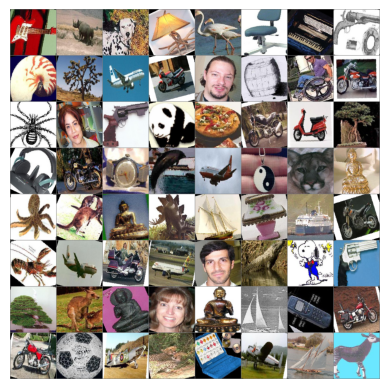

In [9]:

def imshow(img):
    img = img / 2 + 0.5  # normalisierte Bilder wieder in den Bereich [0, 1] bringen
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # axis('off') entfernt die Achsenbeschriftungen
    plt.axis('off')
    plt.show()

# Forder ein Batch von Bildern an
images, labels = next(iter(train_loader))

# Zeuge die Bilder an
imshow(tv.utils.make_grid(images))


## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) sind eine spezielle Art von neuronalen Netzwerken, die besonders gut für die Bilderkennung geeignet sind. Sie sind interessant für uns, weil sie direkt aus den Rohdaten Merkmale lernen können, anstatt auf manuelle Merkmalsextraktion angewiesen zu sein. Durch die Verwendung von Faltungsschichten sind CNNs in der Lage, lokalisierte Muster in den Bildern zu erkennen, wie Kanten, Texturen und Formen. Dies ermöglicht es uns, automatisch relevante Informationen aus den Bildern zu extrahieren und komplexe visuelle Aufgaben wie die Klassifizierung von Bildern zu lösen. Darüber hinaus können CNNs hierarchische Merkmale lernen, indem sie einfache Merkmale in den unteren Schichten zu komplexeren Konzepten in den höheren Schichten kombinieren. Dieser Ansatz ermöglicht es uns, abstraktere Konzepte zu erfassen und hochgradig diskriminative Merkmale für die Bilderkennung zu extrahieren. Insgesamt bieten CNNs eine leistungsstarke und effektive Methode zur Analyse und Verarbeitung von Bildern, was sie zu einem spannenden Werkzeug für Anwendungen wie Bilderkennung, Objekterkennung und medizinische Bildgebung macht.

Generell gibt es viele erprobte CNN Modelle, wie zum Beispiel die Serie der ResNet-Modelle. Das Modell, wofür wir uns hier entschieden haben ist deutlich simpler und daher schneller zu trainieren. Wir opfern aber Klassifierungs Performance am Ende des Tages, da hier aber nur das Prinzip erläutert werden soll, genügt das diesem Leitfaden

## Erstellung eines einfachen CNN-Modells

In diesem Abschnitt werden wir die Erstellung eines einfachen CNN-Modells namens `SimpleCNN` erläutern, das in PyTorch implementiert ist. Hier ist eine Erläuterung des Codes:

- `SimpleCNN`: Dies ist die Klasse, die das CNN-Modell definiert und von der `nn.Module`-Klasse von PyTorch erbt. Das Modell besteht aus mehreren Schichten, die in der `__init__`-Methode definiert sind.

- `self.conv1`, `self.pool`, `self.conv2`: Dies sind die Convolutional- und Pooling-Schichten des CNNs. `self.conv1` ist eine 2D-Faltungsoperation mit 3 Eingangskanälen, 32 Ausgabekanälen, einem Kernel von Größe 3x3, einer Schrittweite von 1 und einem Padding von 1. `self.pool` ist eine Max-Pooling-Schicht mit einem Kernel von Größe 2x2 und einer Schrittweite von 2. `self.conv2` ist eine weitere 2D-Faltungsoperation mit 32 Eingangskanälen, 64 Ausgabekanälen und denselben Kernel- und Padding-Einstellungen wie `self.conv1`.

- `self.fc1`, `self.fc2`: Dies sind die vollständig verbundenen Schichten (Fully Connected Layers) des CNNs. `self.fc1` ist eine lineare Schicht mit 64 * 56 * 56 Eingangsneuronen und 512 Ausgangsneuronen. `self.fc2` ist eine weitere lineare Schicht mit 512 Eingangsneuronen und 101 Ausgangsneuronen, was der Anzahl der Klassen im Caltech-101-Datensatz entspricht.

- `forward`: Diese Methode definiert den Vorwärtsdurchlauf (Forward Pass) des Modells. Die Eingabe `x` wird durch die Convolutional- und Pooling-Schichten geleitet und dann durch die vollständig verbundenen Schichten. Am Ende wird die Ausgabe zurückgegeben.

- Modellinstanz: Am Ende wird eine Instanz des `SimpleCNN`-Modells erstellt, die für das Training und die Validierung verwendet werden kann.

Das `SimpleCNN`-Modell ist ein grundlegendes CNN-Modell, das für die Klassifizierung von Bildern im Caltech-101-Datensatz verwendet werden kann. Es besteht aus Convolutional- und Pooling-Schichten zur Extraktion von Merkmalen aus den Bildern und vollständig verbundenen Schichten zur Klassifikation der extrahierten Merkmale.

In [13]:

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 101)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
model_cpu = SimpleCNN()


Nun können wir visualisieren wie das Netzwerk aussieht. Dazu können wir die Funktion `summary()` aus der Bibliothek `torchsummary` verwenden. Dies berechnet die Anzahl der Parameter und die Größe des Modells. Zusätzlich können wir das Modell Visualisieren mithilfe der `torchviz` Bibliothek, um so zu sehen welche dimensionen die Tensoren haben, welche im Modell weitergegebn werden.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
         MaxPool2d-2         [-1, 32, 112, 112]               0
            Conv2d-3         [-1, 64, 112, 112]          18,496
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Linear-5                  [-1, 512]     102,760,960
            Linear-6                  [-1, 101]          51,813
Total params: 102,832,165
Trainable params: 102,832,165
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 22.97
Params size (MB): 392.27
Estimated Total Size (MB): 415.82
----------------------------------------------------------------


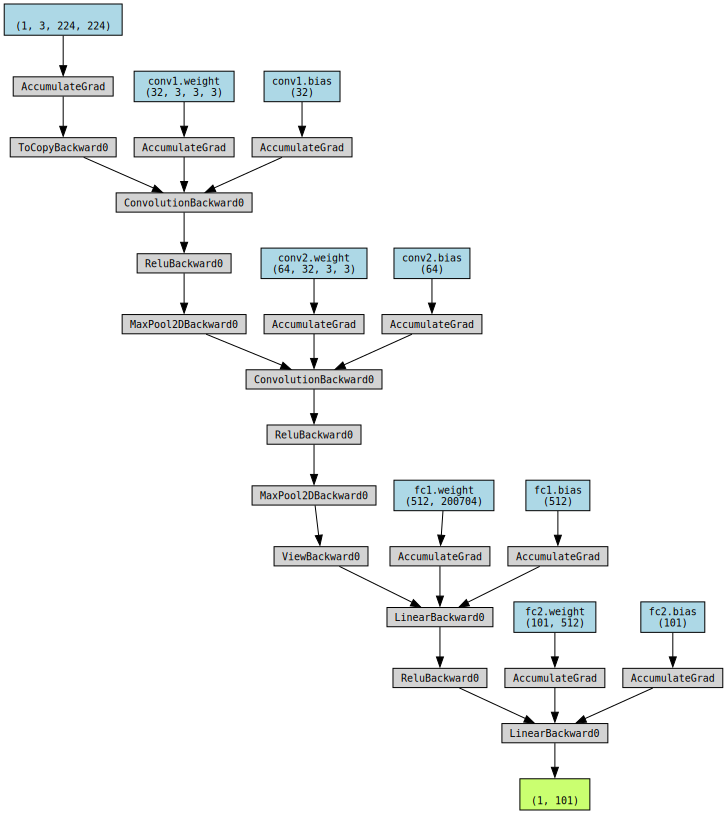

In [14]:
summary(model_cpu, input_size=(3, 224, 224))

x = tc.randn(1, 3, 224, 224).requires_grad_(True).to(device)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))



In diesem Code-Abschnitt werden wichtige Aspekte des Trainingsprozesses festgelegt. 

Zunächst wird die Verlustfunktion definiert, die in diesem Fall die Cross-Entropy-Verlustfunktion (`nn.CrossEntropyLoss()`) ist. Diese Verlustfunktion wird verwendet, um die Diskrepanz zwischen den vorhergesagten Klassen und den tatsächlichen Klassen zu messen und den Verlust zu berechnen.

Dann werden Hyperparameter wie die Anzahl der Epochen (`num_epochs`), die Lernrate (`learning_rate`) und die Batch-Größe (`batch_size`) festgelegt. Diese Parameter beeinflussen das Verhalten des Trainingsprozesses und müssen entsprechend angepasst werden, um optimale Ergebnisse zu erzielen.

Als nächstes wird der Optimierer definiert, in diesem Fall der Adam-Optimierer (`tc.optim.Adam`), der die Gewichte des Modells während des Trainings anpasst. Der Optimierer verwendet die Lernrate (`learning_rate`), um die Größe der Aktualisierungen der Gewichte zu steuern.

Schließlich werden leere Listen erstellt, um die Genauigkeits- und Verlustwerte während des Trainings zu speichern. Diese Listen werden verwendet, um den Fortschritt des Modells im Laufe der Epochen zu verfolgen und können später zur Visualisierung und Bewertung des Modells verwendet werden.

In [15]:

# Definieren der Loss-Funktion
loss_function = nn.CrossEntropyLoss()


# Hyperparamerter
num_epochs = 10
learning_rate = 0.001
batch_size = 64

# Definieren des Optimizers
optimizer = tc.optim.Adam(model.parameters(), lr=learning_rate)

# Liste für die Trainings- und Validierungsgenauigkeit
train_accuracy_list = []
train_loss_list = []

val_accuracy_list = []
val_loss_list = []


### Trainingsprozess starten:

Jetzt sind wir bereit, den Trainingsprozess für unser Bildklassifizierungsmodell zu starten. Wir haben unsere Daten vorbereitet, das Modell definiert und die Optimierungsfunktion sowie die Verlustfunktion festgelegt. Nun werden wir den Trainingsprozess durchlaufen, um die Gewichte des Modells anzupassen und die Leistung zu verbessern.

Wir verwenden den train_loader, um die Trainingsdaten zu laden, und den val_loader, um die Validierungsdaten zu laden. In jeder Epoche werden wir das Modell auf den Trainingsdaten trainieren und anschließend die Leistung auf den Validierungsdaten überprüfen.

Um den Fortschritt des Trainingsprozesses zu verfolgen, werden wir die Training Accuracy, Training Loss, Validierungs Accuracy und Validierungs Loss für jede Epoche speichern. Dies ermöglicht es uns, den Fortschritt zu überwachen und etwaige Verbesserungen oder Probleme zu identifizieren.

In [17]:
# Trainingsschleife
for epoch in range(num_epochs):
    # Initialisiere den Fortschrittsbalken
    pbar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", ncols=80)
    
    # Initialisiere die Werte für die Trainingsgenauigkeit und den Trainingsverlust
    total_correct = 0
    total_loss = 0
    total_samples = 0

    model.train()
    for images, labels in pbar:
        # Schiebe die Daten auf die GPU
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_function(outputs, labels)
        
        # Backward pass und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Genauigkeit berechnen
        _, predicted = tc.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        # Update Fortschrittsbalken Beschreibung
        pbar.set_postfix({"Loss": loss.item()})
        
    # Speichere die Trainingsgenauigkeit und den Trainingsverlust
    train_accuracy = total_correct / total_samples
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(loss.item())
    pbar.set_postfix({"Epoch_Loss": train_loss_list[-1], "Epoch_Accuracy": train_accuracy_list[-1]})

    
    # Validierungsschleife
    model.eval()
    with tc.no_grad():
        total_correct = 0
        total_loss = 0
        total_samples = 0
        for images, labels in val_loader:
            # Schiebe die Daten auf die GPU
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_function(outputs, labels)

            # Berechne die Genauigkeit
            _, predicted = tc.max(outputs.data, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        # Speichere die Validierungsgenauigkeit und den Validierungsverlust
        val_accuracy = total_correct / total_samples
        val_accuracy_list.append(val_accuracy)
        val_loss_list.append(loss.item())
         # Update Fortschrittsbalken Beschreibung
        pbar.set_postfix({"Val_Acc": val_accuracy_list[-1], "Val_Loss": val_loss_list[-1]})



Epoch 1/10:   0%|                                       | 0/109 [00:00<?, ?it/s]/Users/dilankarim/miniforge3/envs/tutorial/lib/python3.10/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():
Epoch 10/10: 100%|█████████████████| 109/109 [04:54<00:00,  2.70s/it, Loss=1.06]


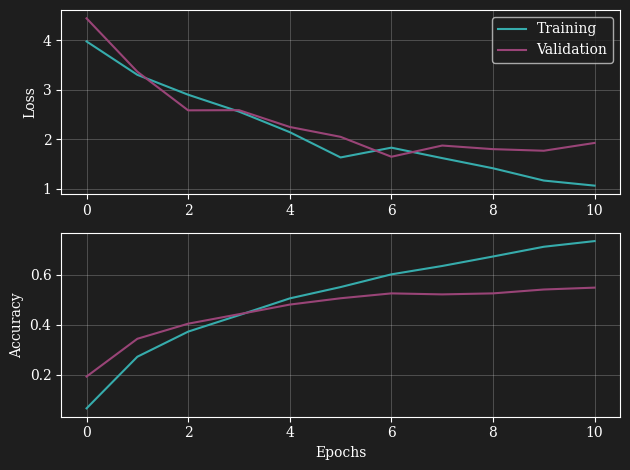

In [45]:
import matplotlib.pyplot as plt

# Set 'dark' theme
plt.style.use('dark_background')

# Set specific properties to match desired theme
params = {"text.color" : "w",
          "ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.facecolor" : "#1e1e1e",
          "figure.facecolor" : "#1e1e1e"}

plt.rc('font', family='serif')
plt.rcParams.update(params)

# Create a figure and axes to create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plotting training loss with #36acac as the accent color
ax1.plot(train_loss_list, color='#36acac', label='Training')
ax1.plot(val_loss_list, color='#994477', label='Validation')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='-', linewidth=0.5, color='white', alpha=0.3) # Added grid

# Plotting validation accuracy with 'magenta' as the accent color
ax2.plot(train_accuracy_list, color='#36acac')
ax2.plot(val_accuracy_list, color='#994477')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='-', linewidth=0.5, color='white', alpha=0.3) # Added grid

# Otherwise the right y-label is slightly clipped
fig.tight_layout()

plt.show()


## Training des neuronalen Netzwerks: Eine Zusammenfassung

In den Trainingsergebnissen unseres neuronalen Netzwerks sehen wir, dass das Training funktioniert und die Genauigkeit für den Trainingsdatensatz, wie erwartet, höher ist. 

Aber was wir nach 8 Epochen beobachten, ist, dass der Verlust für den Validierungsdatensatz sogar ansteigt, während das Training den Verlust immer weiter verbessert. Dieses Verhalten lässt uns nicht mit Sicherheit sagen, was genau passiert, aber die Annahme liegt nahe, dass unser neuronales Netzwerk groß genug ist, um die Beispiele zu "merken".

Wenn wir das Training zu lange laufen lassen, scheint es, dass das Netzwerk beginnt, die Bilder zu memorieren, anstatt die Charakteristiken in den Bildern zu lernen. Das ist nicht unser Ziel. Wir wollen, dass das Modell bisher nicht gesehene Bilder erkennt und nicht nur die Trainingsbilder.

Wie können wir das verhindern? 

Es gibt einige Strategien, um dieses Problem zu beheben. Erstens könnten wir ein sogenanntes "Early Stopping" implementieren. Dies würde das Training stoppen, sobald der Verlust auf dem Validierungsdatensatz ansteigt, um zu verhindern, dass das Modell die Trainingsbilder zu sehr "auswendig lernt". 

Zweitens könnten wir einen größeren Datensatz verwenden, sodass das Netzwerk weniger oft den gleichen Bildern ausgesetzt ist und die Strategie, Bilder zu memorieren, weniger attraktiv wäre. 

Schließlich haben wir bereits zu Beginn eine zufällige Transformation implementiert. Dieser Ansatz hilft ebenfalls bei der Bekämpfung von "Overfitting". Overfitting ist der Fachbegriff für das Phänomen, dass ein Modell die Trainingsdaten zu gut "lernt" und dadurch schlechter auf neuen, bisher nicht gesehenen Daten abschneidet.


## Leistung des Netzwerks

Unser neuronales Netzwerk hat auf dem Caltech101-Datensatz eine Genauigkeit von etwa 50% erzielt. Dies mag auf den ersten Blick nicht besonders hoch erscheinen, insbesondere wenn man es mit binären Klassifikationsproblemen vergleicht, bei denen Genauigkeiten von über 90% üblich sind. Bei der Betrachtung dieser Zahl muss jedoch der Kontext berücksichtigt werden. 

In unserem Fall handelt es sich um ein Multiklassen-Klassifikationsproblem mit 101 verschiedenen Klassen. In solchen Fällen kann eine Genauigkeit von 50% tatsächlich als bemerkenswert angesehen werden, insbesondere wenn man bedenkt, dass ein Zufallsklassifikator, der nur zufällig Vorhersagen trifft, eine Genauigkeit von weniger als 1% erreichen würde. 

In diesem Sinne hat unser Netzwerk seine Fähigkeit unter Beweis gestellt, Muster und Merkmale in den Bilddaten zu erkennen und zu lernen, die ihm ermöglichen, Vorhersagen zu treffen, die weit über dem Zufall liegen.

Als zusätzlichen Leistungstest haben wir unser Netzwerk verwendet, um acht Beispielbilder zu klassifizieren. Die meisten dieser Vorhersagen waren korrekt, was die Fähigkeit unseres Modells bestätigt, effektive und genaue Vorhersagen auf neuen, bisher nicht gesehenen Daten zu treffen. 

Interessant ist auch das Maß an "Confidence" oder Zuversicht, das unser Modell in seinen Vorhersagen zeigt. Einige der Bilder wurden mit hoher Zuversicht richtig klassifiziert, während bei anderen Bildern das Modell weniger sicher war. Dies unterstreicht die Tatsache, dass unser Modell nicht nur Vorhersagen treffen kann, sondern auch ein gewisses Maß an "Unsicherheit" oder "Zweifel" in seinen Vorhersagen ausdrückt. Dies könnte in vielen Anwendungen, bei denen es wichtig ist, den Grad der Unsicherheit in den Vorhersagen des Modells zu kennen, von großem Nutzen sein.

Insgesamt demonstriert die Leistung unseres Modells die Wirksamkeit neuronaler Netzwerke bei der Lösung von komplexen Bildklassifikationsproblemen, auch wenn es immer Raum für Verbesserungen und Optimierungen gibt.



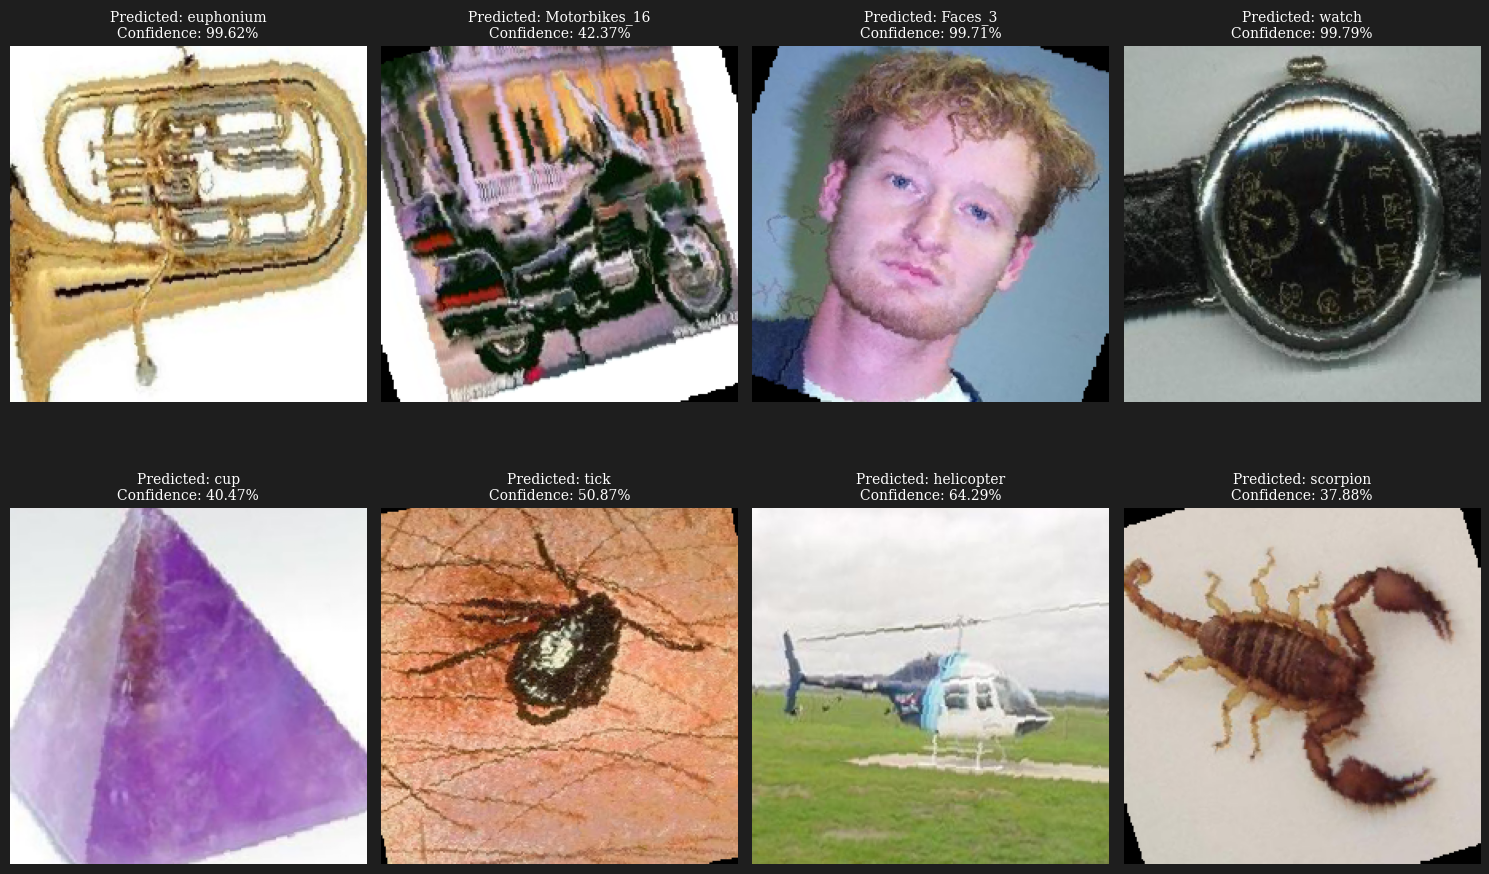

In [72]:
import torch.nn.functional as F

# Get one batch of images and labels
images, labels = next(iter(val_loader))

# Get the model's predictions
model.eval()  # Switch model to evaluation mode
images = images.to(device)
output = model(images)
_, predicted = tc.max(output.data, 1)

# Compute softmax for each output score
softmax_output = F.softmax(output.data, dim=1)

# Get the confidence (max probability) of each prediction
confidences = tc.max(softmax_output, 1)[0].detach().cpu().numpy()

# Switch back to cpu and convert to numpy for plotting
images = images.cpu().numpy()
predicted = predicted.cpu().numpy()
labels = labels.cpu().numpy() # Switch labels back to cpu and convert to numpy

# Get class names
class_names = caltech_data.annotation_categories

# Plot eight examples in 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    # Convert image from tensor format (we also need to transpose the axes)
    img = np.transpose(images[i] / 2 + 0.5, (1, 2, 0))
    
    # Display image and label
    ax.imshow(img)
    ax.set_title(f"Predicted: {class_names[predicted[i]]}\nConfidence: {confidences[i]*100:.2f}%", size=10)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Fazit

In diesem Notebook haben wir den Prozess des Trainierens eines neuronalen Netzwerks mit PyTorch und TorchVision durchlaufen. Wir haben die Caltech101 Datenbank verwendet und ein Modell trainiert, um zwischen 101 verschiedenen Kategorien von Bildern zu unterscheiden.

Während unser Modell gute Ergebnisse auf den Trainingsdaten zeigte, stießen wir auf das Phänomen des Overfitting. Wir diskutierten Strategien zur Bekämpfung von Overfitting, darunter die Implementierung von Early Stopping, die Verwendung größerer Datensätze und die Einführung von zufälligen Transformationen in unserem Daten-Loader.

Zusammenfassend lässt sich sagen, dass dieses Notebook einen guten Einstieg in das Training neuronaler Netzwerke mit PyTorch und TorchVision bietet. Es hat jedoch auch deutlich gemacht, dass die Arbeit eines Data Scientists oder Maschinenlern-Experten nie wirklich endet: Es gibt immer Raum für Verbesserungen und Optimierungen, um bessere Modelle zu entwickeln und bessere Ergebnisse zu erzielen.

## Ausblick

Es gibt noch viele Aspekte, die es sich lohnt, in Zukunft genauer zu betrachten. Hier sind einige Vorschläge:

- **Feinabstimmung des Modells:** Wir haben ein vortrainiertes Netzwerk verwendet und nur die Ausgabeschicht neu trainiert. Eine Möglichkeit zur Verbesserung der Ergebnisse könnte darin bestehen, das gesamte Modell auf unseren speziellen Datensatz "fein abzustimmen". 
- **Andere Modelle ausprobieren:** Es gibt viele verschiedene Arten von Modellen und Architekturen, die in unterschiedlichen Situationen gut funktionieren können. Es wäre interessant, verschiedene Modelle auszuprobieren und zu sehen, wie sie sich auf unserem Datensatz verhalten.
- **Hyperparameteroptimierung:** Wir haben in diesem Notebook nur einen Satz von Hyperparametern verwendet. Es gibt viele Möglichkeiten, wie diese angepasst werden können, um die Modellleistung zu verbessern. 
- **Early Stopping implementieren:** Wie bereits diskutiert, könnte die Implementierung von Early Stopping dazu beitragen, Overfitting zu vermeiden und unser Modell robuster gegenüber neuen, bisher nicht gesehenen Daten zu machen. 
- **Erweiterte Datenvorbereitung:** Neben zufälligen Transformationen könnten wir auch andere Techniken zur Datenaugmentation oder -vorbereitung in Betracht ziehen, um die Vielfalt unserer Trainingsdaten zu erhöhen und Overfitting zu vermeiden.
- **Verwendung größerer Datensätze:** Je mehr Daten zur Verfügung stehen, desto besser kann das Modell lernen, Muster zu erkennen und zu generalisieren. Es könnte hilfreich sein, den Einsatz größerer oder zusätzlicher Datensätze zu prüfen.

Wir hoffen, dass dieses Notebook ein nützlicher Einstieg in das Training von neuronalen Netzwerken mit PyTorch war und freuen uns auf Ihre zukünftigen Entdeckungen und Erfolge auf diesem Gebiet!